<center>
    <img src="https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif" alt="Institute Logo">
</center>

<center><h1><b>Work Integrated Learning Programmes Division M.Tech(AIML)</b></h1></center>
<center><h2><b>Machine Learning</b></h2></center>
<center><h3><b>S2-22_AIMLCZG565</b></h3></center>
<center><h4><b>Assignment 1 – PS-3</b></h4></center>

 ## Group No 96

### **Group Members:**

- Biswadeep Upadhyay
- Ajish Dharman U
- Tejovardhan Medamarti

### Problem Statement ###
Analyze yeast dataset and create a model using logistic regression.

### **DATASET: YEAST**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries/ Dataset
## Import Libraries

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from typing import Optional, List, Dict
from __future__ import annotations

from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder
#standardising the normal feature set - scaling
#feature extraction and standardisarion/normalisartion
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler


## Import Dataset
Note: Please make sure to mount the google drive, before executing the below step.

In [9]:
yeast = pd.read_csv('/content/drive/MyDrive/Semester1/ML/data/yeast.csv')
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Exploratory Data Analysis (EDA)

###Data Visualization and Exploration of yeast dataset

- Print 2 rows for sanity check to identify all the features present in the dataset and if the
target matches with them.
- Comment on class imbalance with appropriate visualization method.
- Provide appropriate visualizations to get an insight about the dataset.
- Do the correlational analysis on the dataset. Provide a visualization for the same. Will
this correlational analysis have effect on feature selection that you will perform in the
next step? Justify your answer. Answer without justification will not be awarded
marks.
- Any other visualisation specific to the problem statement

In [10]:
yeast.head(2)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


 - Info method helps to find the schema details of the pandas dataframe.

In [11]:
yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


 - Shape method  provide the number of row and columns of the given dataset.

In [12]:
#number of records x features
yeast.shape

(1484, 9)

- Below table will show the name distribution in the yeast dataset. We can clearly the data is not equally distributed and does have the skewness.

In [13]:
#multi-class varification - class imbalance
yeast["name"].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

- Below code will help in finding the unqique values in the name attribute.

In [14]:
number_of_classes = yeast.nunique()['name']
number_of_classes

10

- Below is the 5 point summary table, which will help us in identifying the data distribution.

In [15]:
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


- Below code, will help us in identifying the data attributes having any NULLs/ NAN in the dataset. This is one of the important analysis for any given dataset.

In [16]:
#null check
yeast.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [17]:
columns = yeast.columns

categorical_columns = list(yeast.dtypes[yeast.dtypes == 'object'].index)
numerical_columns = [c for c in columns if c not in categorical_columns]
categorical_columns, numerical_columns

(['name'], ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'])

 - Since we are dealing with the logistic regression, our target variable is the name class. Below code, will help us in identifying the no of catogories avaialable in the name attribute.

In [18]:
features = numerical_columns
label = categorical_columns[0]
features, label

(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'], 'name')

### Data Visualisation

Data visualization plays an important role in Machine learning to understand the data distribution.

In [19]:
class_counts = yeast["name"].value_counts()
class_counts

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

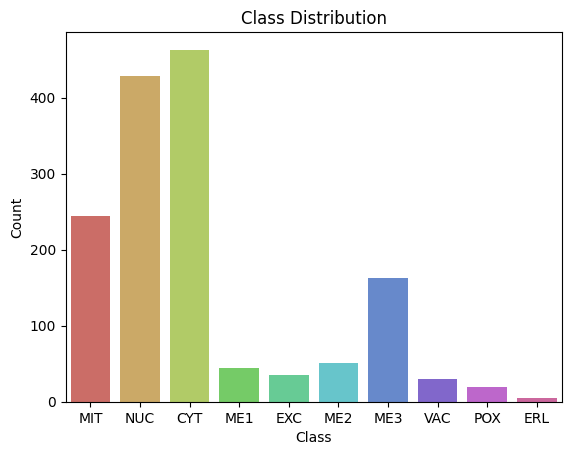

In [20]:
sns.countplot(x='name', data=yeast, palette ='hls')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


- Below pie chart will help us understanding how the data is distributed by our target variable **(name)** which contains multi class labels. (For example, CYT consumes 31.2% of the whole distribution).

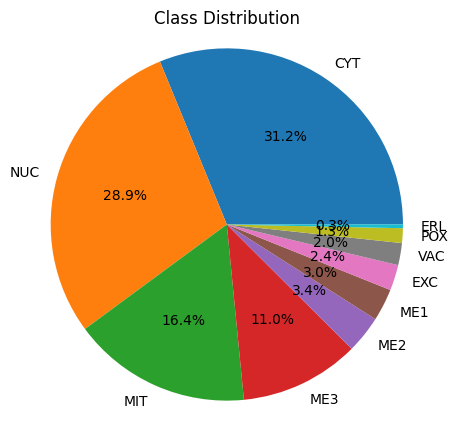

In [21]:
#pie chart
# Plot the class distribution as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

In [22]:
print(features)

['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']


 - Identifying noise in the dataset is very challenging task for any machine learning program. *Outliers* help us to identify the data in the normal distribution. Fixing outliers requires domain knowledge and understanding of the dataset. Since our dataset is very small in nature, we will just specify the  data skewness and the outlier data will not be removed. Examples given below.

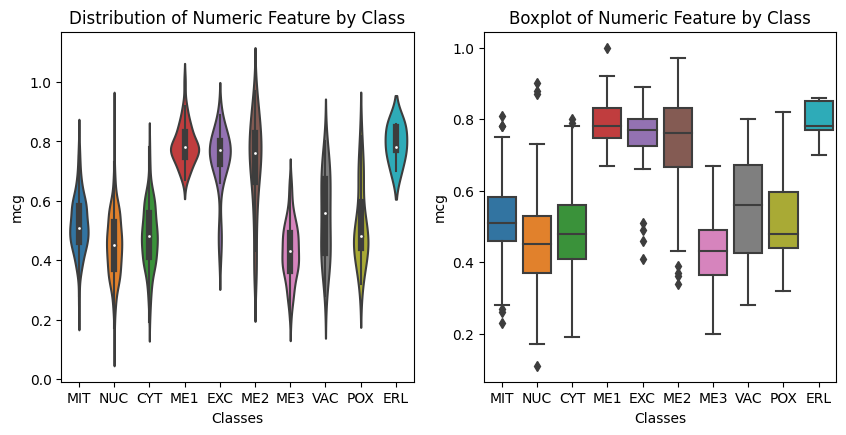

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.violinplot(data=yeast, x='name', y=features[0])
plt.xlabel('Classes')
plt.ylabel(features[0])
plt.title('Distribution of Numeric Feature by Class')
plt.subplot(2,2,2)
sns.boxplot(data=yeast, x=label, y=features[0])
plt.xlabel('Classes')
plt.ylabel(features[0])
plt.title('Boxplot of Numeric Feature by Class')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


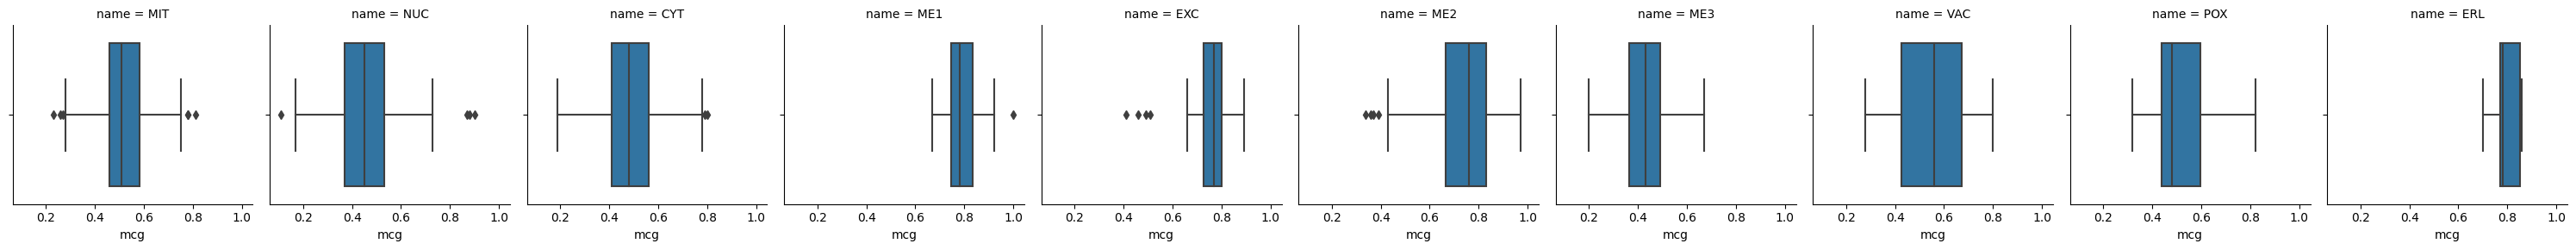

In [24]:
g = sns.FacetGrid(yeast, col=label)
g.map(sns.boxplot, features[0]);


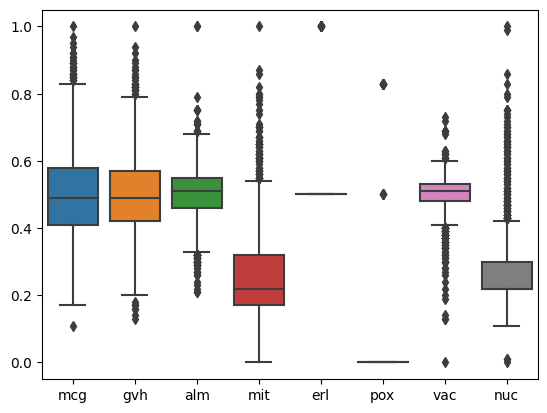

In [25]:
sns.boxplot(yeast)
plt.show()

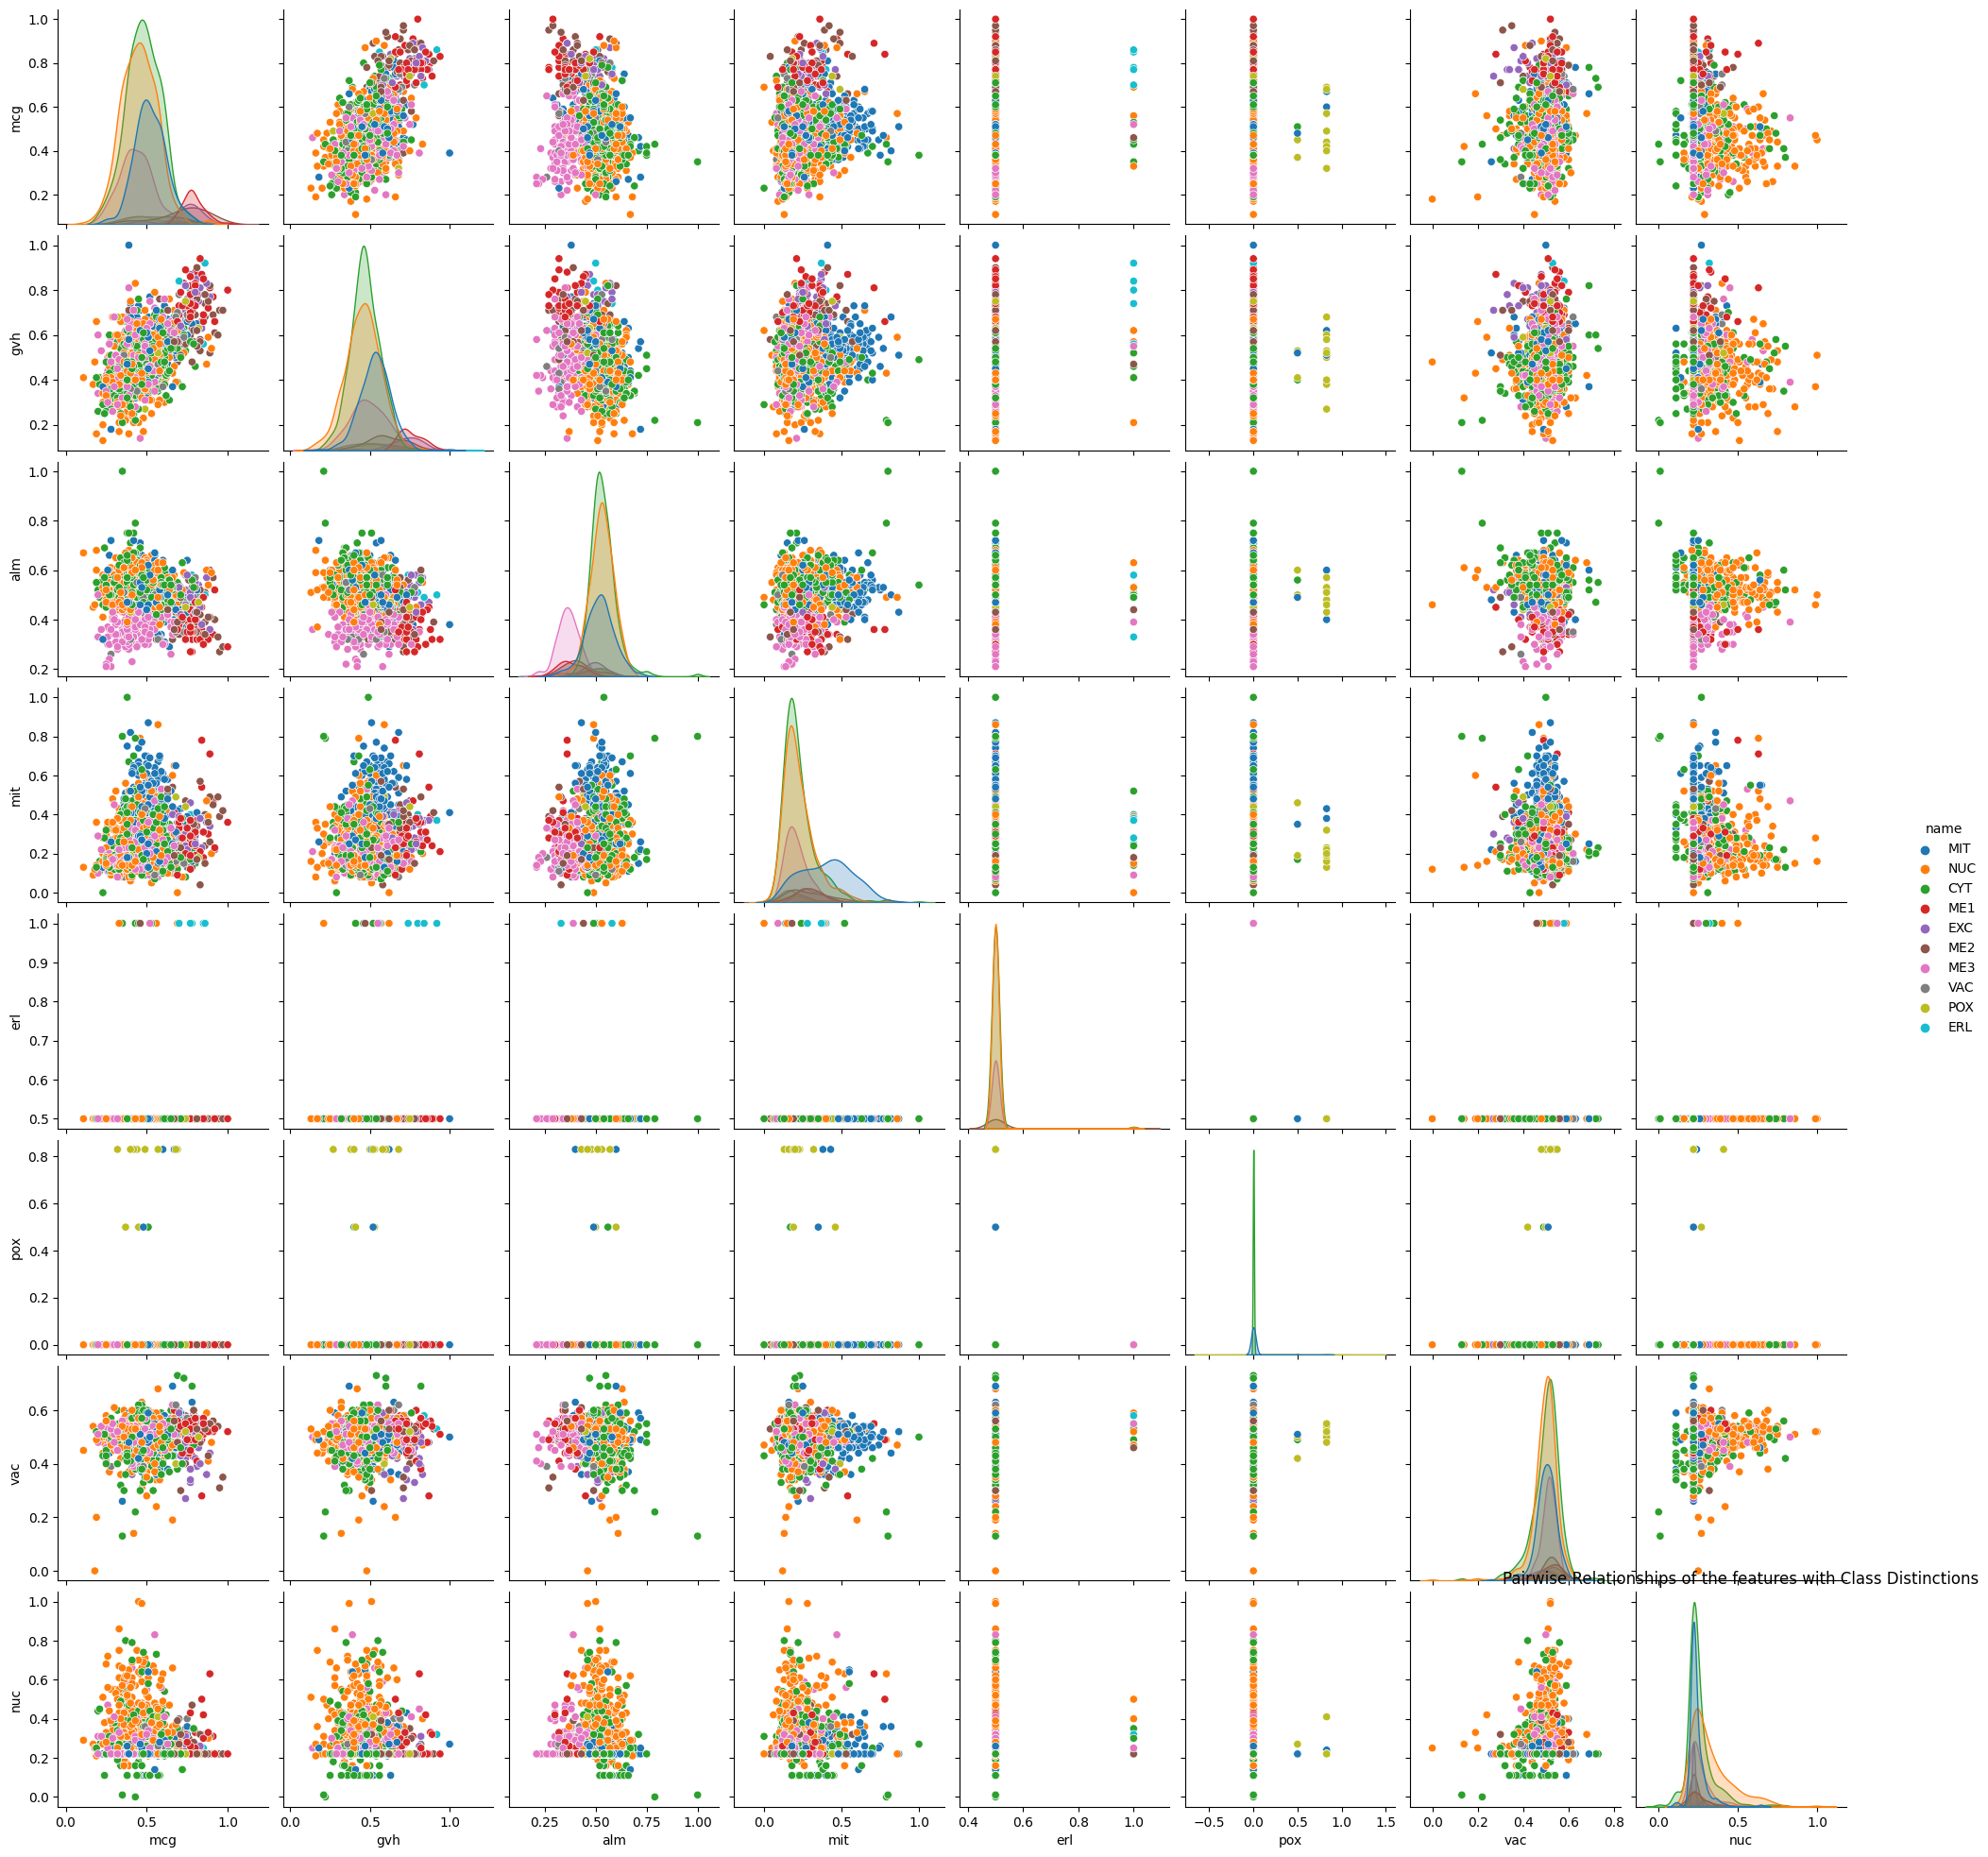

In [26]:
sns.pairplot(data=yeast, vars=features, hue=label)
plt.title('Pairwise Relationships of the features with Class Distinctions')
plt.show()

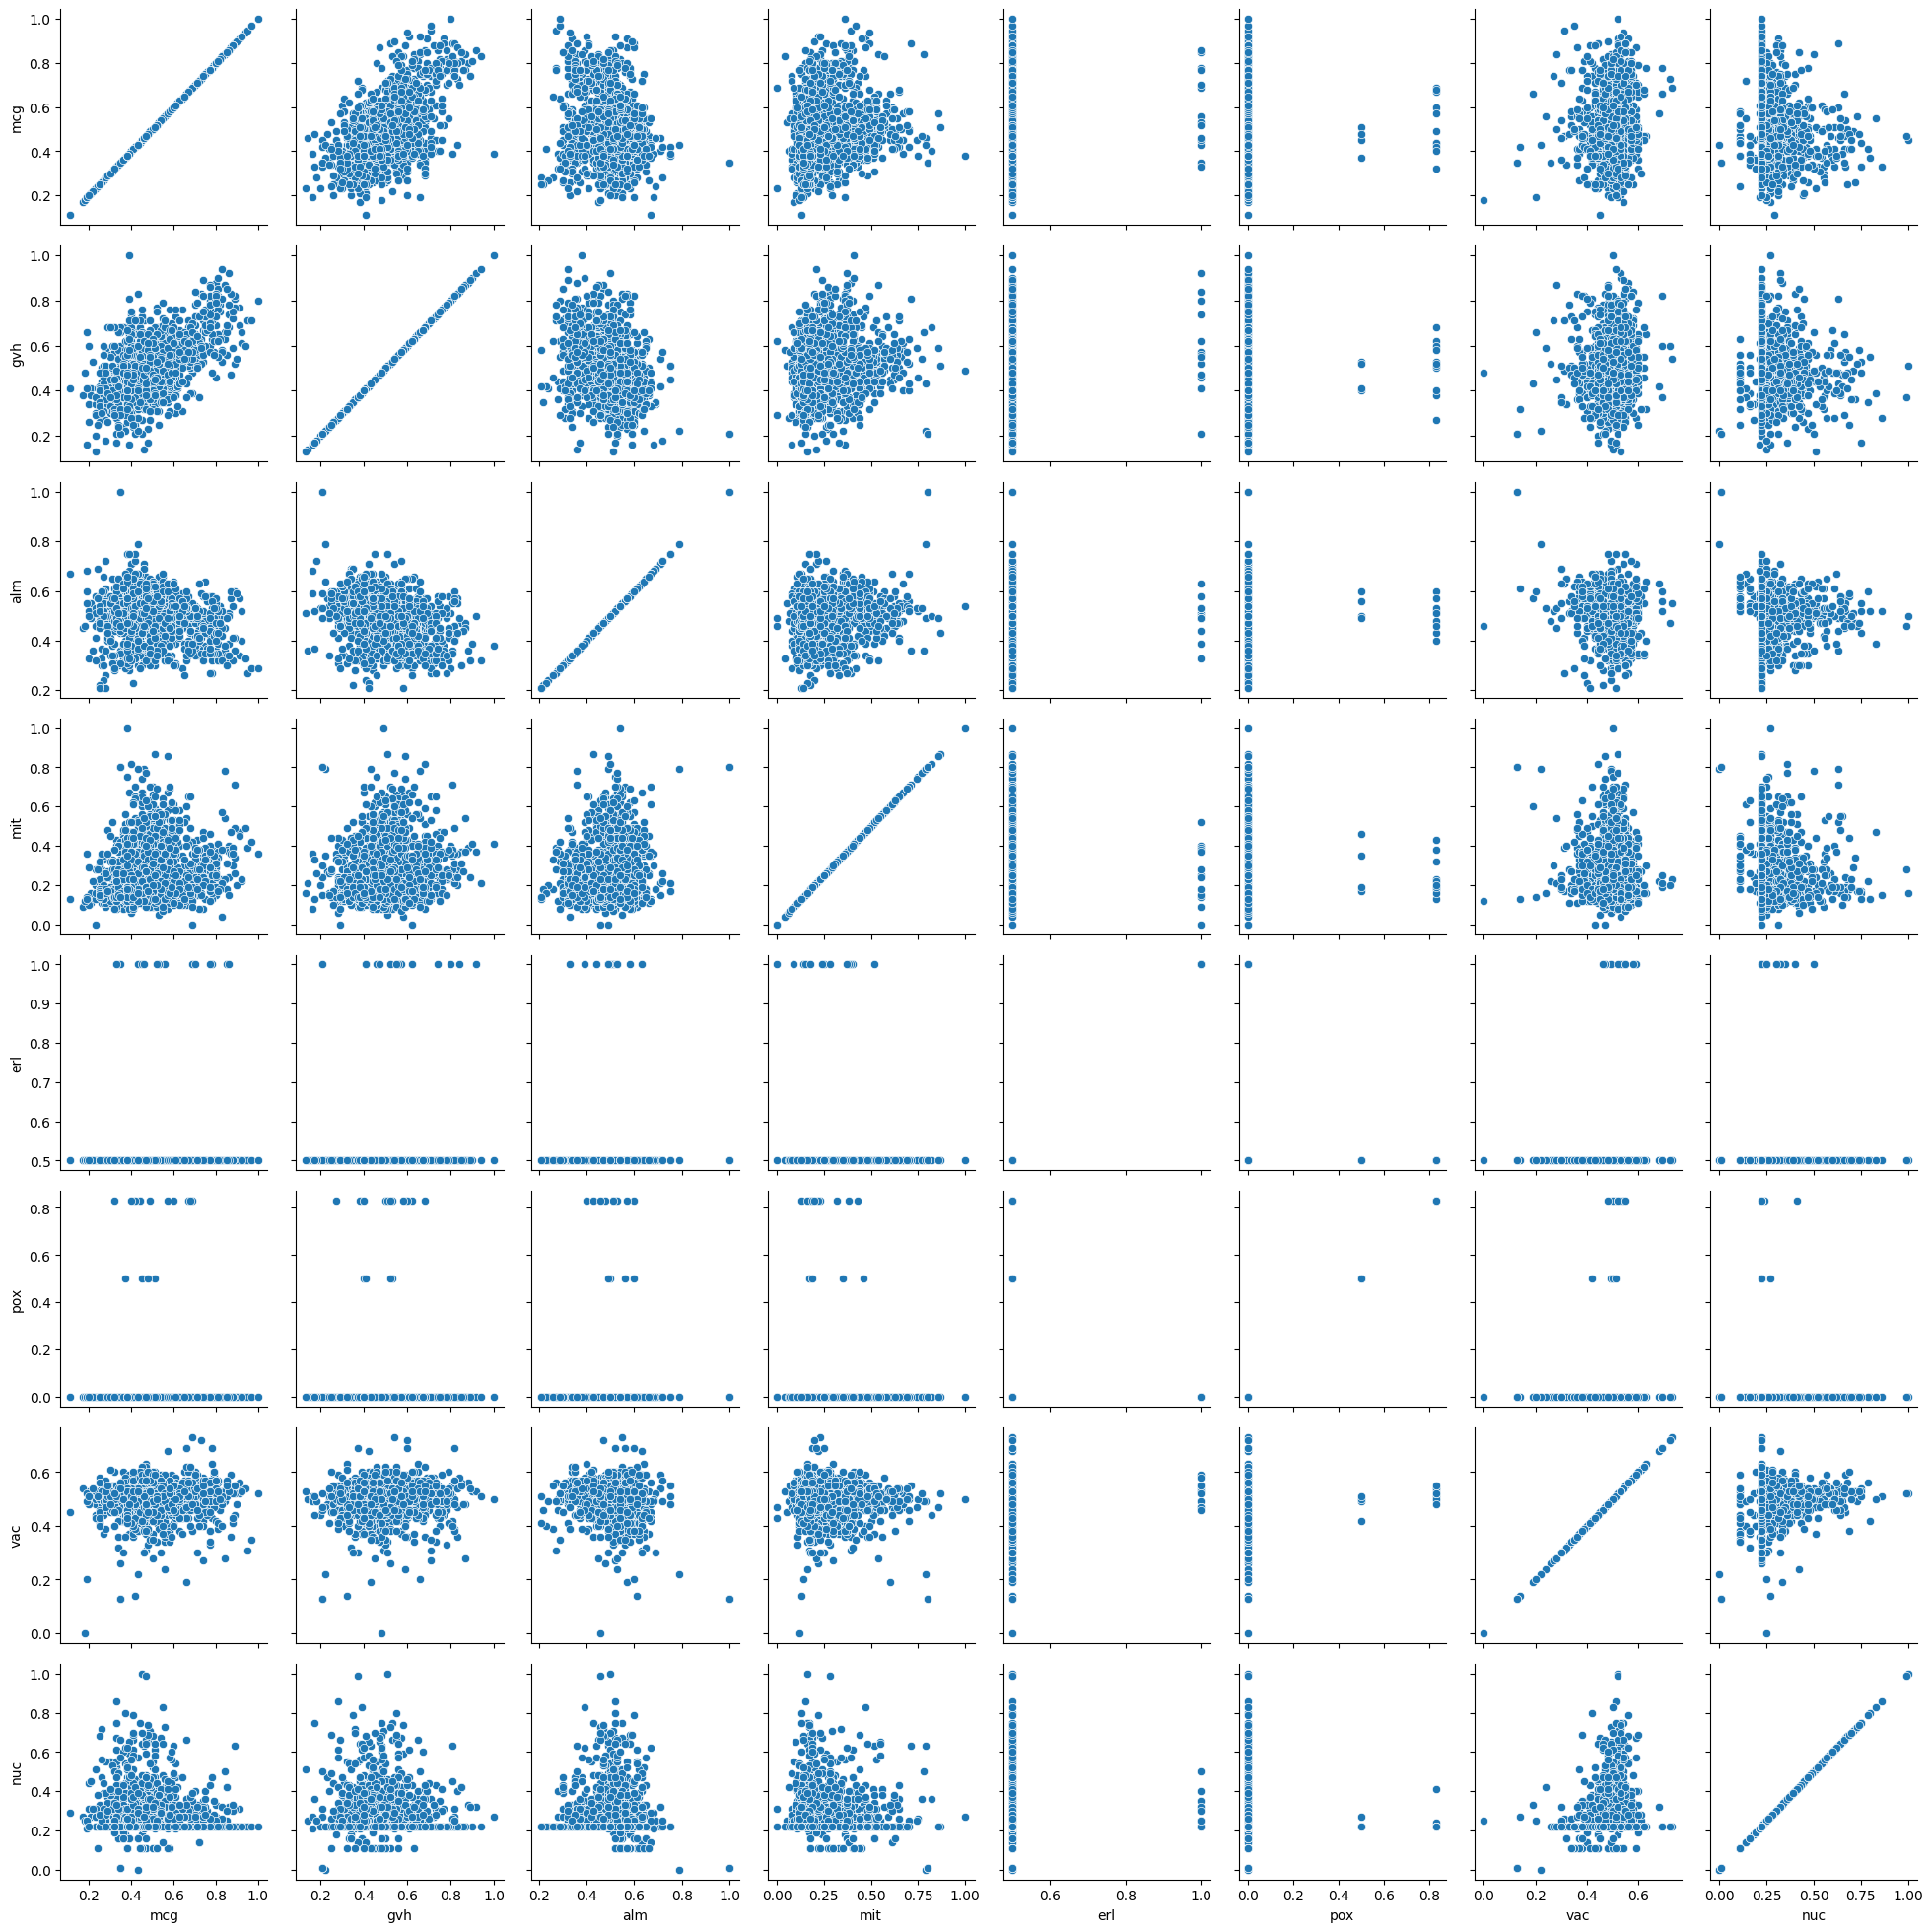

In [27]:
g = sns.PairGrid(yeast)
g.map(sns.scatterplot)

* mutual information - to measure the importance of categorical variables
* correlation - to measure the importance of numeric variables

### correlation

* The r value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.

* from 2 strongly correlated features we can skip one, features which are very weekly correlated should be picked.

* From the below correlation analysis, we can clearly see that  ***the feature gvh and mcg*** has higher correlation values when compared with the other features.

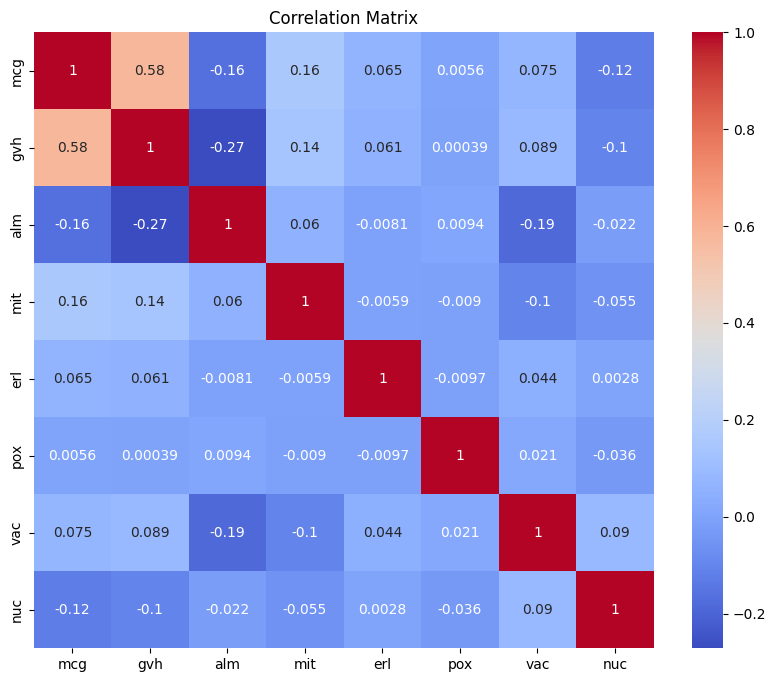

In [28]:
## correlation
# Calculate the correlation matrix
correlation_matrix = yeast[features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing and Cleansing

1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if
any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks
and its effect on model evaluation parameters.
2. Apply appropriate feature engineering techniques for them. Apply the feature
transformation techniques like Standardization, Normalization, etc. You are free to apply
the appropriate transformations depending upon the structure and the complexity of your
dataset. Provide proper justification. Techniques used without justification will not be
awarded marks. Explore few techniques for identifying feature importance for your
feature engineering task.

- Below feature columns does not have any Null/ NAN values. Hence no action requried to replace to remove the existing data.

In [29]:
## finding missing values
yeast.isna().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

## Dealing with the outliers
* We can use the interquartile range (IQR) to identify and remove any outlier data points that are beyond a certain number of standard deviations from the mean. This is done using the following steps:
1. Calculate the first quartile ***Q1***, which is the median of the lower half
of the dataset.
2. Calculate the third quartile ***Q3***, also known as the "75th
percentile", or Tukey's fence, which is the median of the upper half of the
dataset.
3. Find the difference between these two quartiles, called ***IQR***.
4. Define an allowable margin for error in terms of multiples of the IQR
above/below each quartile value.
For example, if you want your errors to be
no more than one quarter outside the boxplot whiskers, set this limit at ±
- lower_lim = Q1 - 1.5 * IQR
- upper_lim = Q3 + 1.5 * IQR


In [30]:
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [31]:
yeast_without_outlier = yeast.copy()

In [32]:
for feature in features:
    #calculating outlier for features
    Q1 = yeast[feature].quantile(0.25)
    Q3 = yeast[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    lower_lim, upper_lim

    # removing outliers
    lower_outliers = (yeast[feature] < lower_lim)
    higher_outliers = (yeast[feature] > upper_lim)
    yeast_without_outlier[feature] = yeast[feature][~(lower_outliers | higher_outliers)]

In [33]:
yeast_without_outlier.shape

(1484, 9)

In [34]:
yeast_without_outlier.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [35]:
yeast_without_outlier.isnull().sum()

mcg      31
gvh      38
alm      71
mit      70
erl      14
pox      15
vac      98
nuc     134
name      0
dtype: int64

In [36]:
yeast_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1453 non-null   float64
 1   gvh     1446 non-null   float64
 2   alm     1413 non-null   float64
 3   mit     1414 non-null   float64
 4   erl     1470 non-null   float64
 5   pox     1469 non-null   float64
 6   vac     1386 non-null   float64
 7   nuc     1350 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


### Balancing Technique

The effect of data balancing on model evaluation parameters:
Data balancing techniques are often used when dealing with imbalanced datasets, where one class is significantly underrepresented compared to others. Some common data balancing techniques include:

* Undersampling: Randomly removing instances from the majority class to balance the dataset.
* Oversampling: Generating synthetic samples for the minority class to balance the dataset.
* SMOTE (Synthetic Minority Over-sampling Technique): Creating synthetic samples for the minority class by interpolating between existing samples.


### Objective: Split the data frame into Train and Test:
- Split of training and test data:
- The stratify parameter will ensure that the train and test split has the same class distribution ratio as the original dataset.
- It is crucial in the case of imbalanced datasets.
Otherwise, it might happen that the training data only consists of the majority class.
Below listed functions has been applied as part of the feature engineering.


###Standardizing Techniques:
-- Models like Logistic Regression, require the data to be appropriately scaled to perform well. We have couple of methods to standardize:
  - DictVectorizer
  - StandardScaler

In this case, we have chosen, ***StandardScaler()*** for the model build.

Because we are dealing with the categorical variables for the multi class classification, and for the model to perform well, we are converting the labels into numerical format.
Below are the methods that can be used to convert the Target variables.

- OneHotEncoder()
- LabelEncoder()
- LabelBinarizer()



### Dealing with class imbalances ###
Oversampling is one of the most widely used techniques to deal with imbalance classes.
To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model. Here we are using SMOTE for oversampling.

### Defintion declarations:
1. **get_X_y()**: Will be used to split the data frame along with the encoding the features and target variable (*name*).
2. **get_model()**: To get the logistic regression model, depending on the various input parameters on multi classification. *It Supports regularization also.*
3. **evaluate_model()**: This function will test the performance of the model including ***K-Fold cross validation***.

In [90]:
# function to get feature and label for training Model
def get_X_y(data: pd.DataFrame,
            features : List[str],
            label: str,
            test_split_ratio: float = 0.2,
            sampling_technique: str = 'smote',
            sampling_neighbors: int = 1,
            feature_encoding_technique: str = 'scale',
            target_encoding_technique: str = 'label') -> Optional[List[np.array, np.array, np.array, np.array]]:

        from sklearn.model_selection import train_test_split

        X_full = data.drop(label,axis=1)
        y_full = yeast[label]

        # split into Train-Test sets with a ratio specified by user (default is 80:20)
        #split of train and test dataset
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_full, y_full, test_size=test_split_ratio, random_state=1, stratify=y_full)

        print(f'Shape of Training Data set: X: {X_train_r.shape}, y: {y_train_r.shape}')
        print(f'Shape of Testing Data set: X: {X_test_r.shape}, y: {y_test_r.shape}')

        #standardising the normal feature set - scaling
        #feature extraction and standardisarion/normalisartion
        from sklearn.feature_extraction import DictVectorizer
        from sklearn.preprocessing import StandardScaler

        if feature_encoding_technique == 'scale':
                scaler = StandardScaler()
                X_train_en = scaler.fit_transform(X_train_r)
                X_test_en = scaler.transform(X_test_r)
        elif feature_encoding_technique == 'vector':
                dv  = DictVectorizer(sparse=False)
                train_dict = X_train_r.to_dict(orient='records')
                X_train_en = dv.fit_transform(train_dict)

                test_dict = X_test_r.to_dict(orient='records')
                X_test_en = dv.transform(test_dict)

        else:
                return -1

        print("Feature Extraction/standardisation complete.")

        #target_encoding
        from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder

        onehot_encoder = OneHotEncoder()
        label_encoder = LabelEncoder()
        label_binder = LabelBinarizer()


        if target_encoding_technique == 'none':
                y_train_en = y_train_r.values
                y_test_en = y_test_r.values
        elif target_encoding_technique == 'onehot':
                y_train_en = onehot_encoder.fit_transform(y_train_r.values.reshape(-1,1)).toarray()
                y_test_en = onehot_encoder.transform(y_test_r.values.reshape(-1,1)).toarray()
        elif target_encoding_technique == 'label':
                y_train_en = label_encoder.fit_transform(y_train_r.values)
                y_test_en = label_encoder.transform(y_test_r.values)
        elif target_encoding_technique == 'binary':
                y_train_en = label_binder.fit_transform(y_train_r.values)
                y_test_en = label_binder.transform(y_test_r.values)

        else:
                #label encoding with float output
                y_train_en = label_encoder.fit_transform(y_train_r.values).astype('float64')
                y_test_en = label_encoder.transform(y_test_r.values).astype('float64')

        print("Encoding of target variable is complete.")

        #re-sampling to handle class imbalance on training data

        if sampling_technique == 'smote':
                ## resampling : oversampling using SMOTE
                from imblearn.over_sampling import SMOTE
                sm = SMOTE(random_state=2, k_neighbors=sampling_neighbors)
                X_train_res, y_train_res = sm.fit_resample(X_train_en, y_train_en)
                print(f'Resampling of training data using {sampling_technique} is complete.')
                print(f'Shape of resampled training data set: X: {X_train_res.shape}, y: {y_train_res.shape}')
        else:
                print('Resampling ignored.')
                X_train_res, y_train_res = X_train_en, y_train_en


        return X_train_res, X_test_en, y_train_res, y_test_en


In [75]:
def get_model(
        multi_class: str,
        solver_function: str,
        max_iter: int = 1000,
        regularization: bool = False,
        penalty: str = 'l2',
        C: float = 0.01
) -> Optional[LogisticRegression]:

        from sklearn.linear_model import LogisticRegression


        print(f'''Params for model:
              Multi Class : {multi_class}
              Solver Function : {solver_function}
              Max Iteration : {max_iter}''')

        if not regularization:

                print('No Regularization is selected.')
                model = LogisticRegression(multi_class = multi_class,
                                        solver = solver_function,
                                        max_iter = max_iter)

                return model

        else:
                print('Regularization is selected for building the model.')
                print(f'Penalty : {penalty}')
                print(f'C : {C}')

                model = LogisticRegression(multi_class = multi_class,
                                        solver = solver_function,
                                        max_iter = max_iter,
                                        penalty = penalty,
                                        C = C)

                return model

In [105]:
def evaluate_model(
        model: Optional[LogisticRegression],
        X_train: Optional[np.array],
        X_test: Optional[np.array],
        y_train: Optional[np.array],
        y_test: Optional[np.array],
        k_fold: int = 10
) -> None:

        from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
        from sklearn.model_selection import cross_val_predict, cross_val_score, RepeatedStratifiedKFold

        # training the model with traing dataset.
        model.fit(X_train, y_train)
        print('Model trained with training dataset')

        #testing model against testing datseet
        y_pred_proba_test = model.predict_proba(X_test)
        y_pred_test = model.predict(X_test)
        print(f'Accuracy score on testing dataset: {accuracy_score(y_test, y_pred_test)}')
        print(f'ROC AUC Score on testing dataset: {roc_auc_score(y_test, y_pred_proba_test, multi_class="ovr")}')

        #testing model against training datseet
        y_pred_proba_train = model.predict_proba(X_train)
        y_pred_train = model.predict(X_train)
        print(f'Accuracy score on training dataset: {accuracy_score(y_train, y_pred_train)}')
        print(f'ROC AUC Score on training dataset: {roc_auc_score(y_train, y_pred_proba_train, multi_class="ovr")}')


        print(f'\n\n\n\nClassification report on Testing dataset:\n {classification_report(y_test, y_pred_test)}')


        #calculating confusion matrix
        y_pred_cross = cross_val_predict(model, X_train, y_train, cv=3)
        conf_mx = confusion_matrix(y_train, y_pred_cross)
        print('\n\n\n\n\nConfusion Matrix: ')
        print(conf_mx)

        plt.matshow(conf_mx, cmap=plt.cm.gray)
        plt.show()

        #K-Fold cross validarion
        cv = RepeatedStratifiedKFold(n_splits=k_fold, n_repeats=1, random_state=1)
        # evaluate the model
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        print('\n\n\n\nK-Fold Cross validation:')
        for i, score in enumerate(scores):
                print(f'Fold: {i%k_fold + 1} ----> Validation Score: {score}')


- If you observe the above shape, data has been increased to 3700, which is nothing but ***Oversampling***.

#Model Building

### Building the Classification Model - Logistic Regression
* multi-class classifier : Multinomial Logistic Regression: Modified version of logistic regression that predicts a multinomial probability (i.e. more than two classes) for each input example.

* The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as “lbfgs“.

* The multinomial logistic regression model will be fit using cross-entropy loss and will predict the integer value for each integer encoded class label.

* An important hyperparameter to tune for multinomial logistic regression is the penalty term.

* This term imposes pressure on the model to seek smaller model weights. This is achieved by adding a weighted sum of the model coefficients to the loss function, encouraging the model to reduce the size of the weights along with the error while fitting the model.

* A popular type of penalty is the L2 penalty that adds the (weighted) sum of the squared coefficients to the loss function. A weighting of the coefficients can be used that reduces the strength of the penalty from full penalty to a very slight penalty.

* Regularisation : C (Learning rate)
    * By default, the LogisticRegression class uses the L2 penalty with a weighting of coefficients set to 1.0. The type of penalty can be set via the “penalty” argument with values of “l1“, “l2“, “elasticnet” (e.g. both), although not all solvers support all penalty types. The weighting of the coefficients in the penalty can be set via the “C” argument.
    * The weighting for the penalty is actually the inverse weighting, perhaps penalty = 1 – C.
    * Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    * This means that values close to 1.0 indicate very little penalty and values close to zero indicate a strong penalty. A C value of 1.0 may indicate no penalty at all.
    * C close to 1.0: Light penalty.
    * C close to 0.0: Strong penalty.



### CASE 1 : Train = 80 % Test = 20%
- Our objective is to split the yeast dataset into 80, 20 data split.
1. Train = 80 % Test = 20%
  * [ x_train1,y_train1] = 80% ;
  * [ x_test1,y_test1] = 20%


In [102]:
X_train, X_test, y_train, y_test = get_X_y(
                                            yeast,
                                            features,
                                            label,
                                            0.2,
                                            'smote',
                                            3,
                                            'scale',
                                            'label'
                                          )

Shape of Training Data set: X: (1187, 8), y: (1187,)
Shape of Testing Data set: X: (297, 8), y: (297,)
Feature Extraction/standardisation complete.
Encoding of target variable is complete.
Resampling of training data using smote is complete.
Shape of resampled training data set: X: (3700, 8), y: (3700,)


- If you observe the above print statements, data has been increased to 3700, which is nothing but ***Oversampling***.

#### Category 1: Building and testing the model **without** *regularization*.

- Step 1: Model Build

In [103]:
#model without regularization
model1 = get_model(
    multi_class = 'multinomial',
    solver_function = 'lbfgs',
    max_iter = 10000,
    regularization = False
)

Params for model: 
              Multi Class : multinomial
              Solver Function : lbfgs
              Max Iteration : 10000
No Regularization is selected.


-Step 2: Training and evaluating the model.

Model trained with training dataset
Accuracy score on testing dataset: 0.4781144781144781
ROC AUC Score on testing dataset: 0.8537012530088658
Accuracy score on training dataset: 0.6459459459459459
ROC AUC Score on training dataset: 0.9269734599464329




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39        93
           1       0.00      0.00      0.00         1
           2       0.23      0.43      0.30         7
           3       0.47      0.78      0.58         9
           4       0.25      0.40      0.31        10
           5       0.67      0.69      0.68        32
           6       0.67      0.65      0.66        49
           7       0.61      0.48      0.54        86
           8       0.25      0.50      0.33         4
           9       0.03      0.17      0.05         6

    accuracy                           0.48       297
   macro avg       0.37      0.44      0.38       2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))







Confusion Matrix: 
[[134   0  17   1  12   3  51  70  13  69]
 [  0 370   0   0   0   0   0   0   0   0]
 [ 28   0 292  13  21   0  16   0   0   0]
 [  0   0  26 311  31   2   0   0   0   0]
 [  3   0  50  36 217  16   4   9   0  35]
 [  1   1   0   6  11 293   5  17   0  36]
 [ 49   0  31   8  18   7 208  17   7  25]
 [ 90   2  10   0   4  14  33 178   3  36]
 [ 82   0   2   0  26   0  13   0 213  34]
 [ 59   0  22  22  10  81  19   4   1 152]]


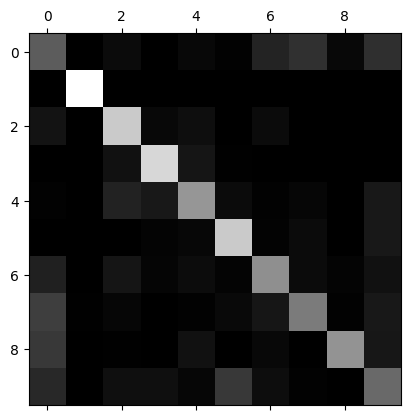





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6675675675675675
Fold: 2 ----> Validation Score: 0.6567567567567567
Fold: 3 ----> Validation Score: 0.6135135135135135
Fold: 4 ----> Validation Score: 0.6405405405405405
Fold: 5 ----> Validation Score: 0.6351351351351351
Fold: 6 ----> Validation Score: 0.6324324324324324
Fold: 7 ----> Validation Score: 0.6378378378378379
Fold: 8 ----> Validation Score: 0.6324324324324324
Fold: 9 ----> Validation Score: 0.6351351351351351
Fold: 10 ----> Validation Score: 0.6432432432432432


In [106]:
evaluate_model(model1,X_train, X_test, y_train, y_test, 10)

Below are the ROC AUC outcomes for the model ***without Regularization***.

    - Accuracy score on testing dataset: 0.4781144781144781
    - ROC AUC Score on testing dataset: 0.8537012530088658
    - Accuracy score on training dataset: 0.6459459459459459
    - ROC AUC Score on training dataset: 0.9269734599464329

- Classification Report
- Confusion Matrix
- Please also see **the** KFold validation scores where K =10.

- We can clearly see that output values are almost similar for both training and test data. Hence we can conclude that our model is not either ***over fitted or under fitted.***



#### Category 2: Building and testing the model **with** *regularization*.

- Step 1: Model Build and Evaluation:
We are building the model with 5 different values of coefficient *C*.

**Regularization Technique used: L2**




Evaluation for C = 0.0001
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l2
C : 0.0001
Model trained with training dataset
Accuracy score on testing dataset: 0.494949494949495
ROC AUC Score on testing dataset: 0.823999066641961
Accuracy score on training dataset: 0.5510810810810811
ROC AUC Score on training dataset: 0.8894592159727296




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.50      0.24      0.32        93
           1       0.50      1.00      0.67         1
           2       0.27      0.43      0.33         7
           3       0.31      0.89      0.46         9
           4       0.00      0.00      0.00        10
           5       0.54      0.81      0.65        32
           6       0.70      0.65      0.67        49
           7       0.49      0.62 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))







Confusion Matrix: 
[[ 94   3  15  11   1  27  34 163   1  21]
 [  0 370   0   0   0   0   0   0   0   0]
 [ 25   0 167 155   0   3   5  15   0   0]
 [  0   0   2 368   0   0   0   0   0   0]
 [  0   6  29 277   2  50   0   3   0   3]
 [  2   3   0  21   0 327   2  15   0   0]
 [ 37   0  22  31   2  21 206  46   2   3]
 [ 39   3   8   3   1  26  23 262   0   5]
 [ 67   0  20  15   0  24   6  28 210   0]
 [ 47   0   8  81   2 115  14  83   0  20]]


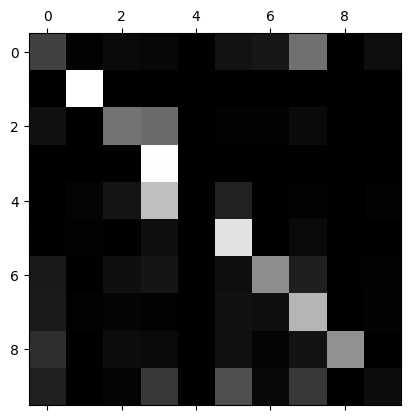





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.5837837837837838
Fold: 2 ----> Validation Score: 0.5648648648648649
Fold: 3 ----> Validation Score: 0.5378378378378378
Fold: 4 ----> Validation Score: 0.5243243243243243
Fold: 5 ----> Validation Score: 0.5621621621621622
Fold: 6 ----> Validation Score: 0.5540540540540541
Fold: 7 ----> Validation Score: 0.5459459459459459
Fold: 8 ----> Validation Score: 0.5243243243243243
Fold: 9 ----> Validation Score: 0.5405405405405406
Fold: 10 ----> Validation Score: 0.5297297297297298



Evaluation for C = 0.001
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l2
C : 0.001
Model trained with training dataset
Accuracy score on testing dataset: 0.5286195286195287
ROC AUC Score on testing dataset: 0.8481253978381984
Accuracy score on training dataset: 0.6124324324324324
ROC AUC Score on training da

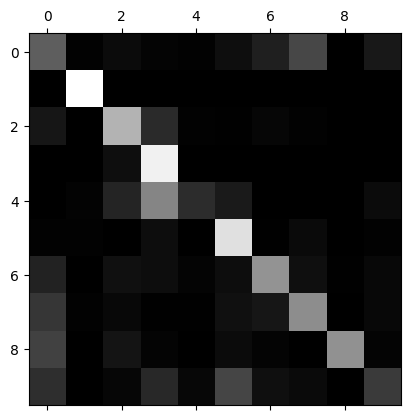





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6378378378378379
Fold: 2 ----> Validation Score: 0.6324324324324324
Fold: 3 ----> Validation Score: 0.5783783783783784
Fold: 4 ----> Validation Score: 0.6216216216216216
Fold: 5 ----> Validation Score: 0.5918918918918918
Fold: 6 ----> Validation Score: 0.5837837837837838
Fold: 7 ----> Validation Score: 0.6324324324324324
Fold: 8 ----> Validation Score: 0.6162162162162163
Fold: 9 ----> Validation Score: 0.6027027027027027
Fold: 10 ----> Validation Score: 0.5783783783783784



Evaluation for C = 0.01
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l2
C : 0.01
Model trained with training dataset
Accuracy score on testing dataset: 0.5185185185185185
ROC AUC Score on testing dataset: 0.8618021643057399
Accuracy score on training dataset: 0.6413513513513514
ROC AUC Score on training data

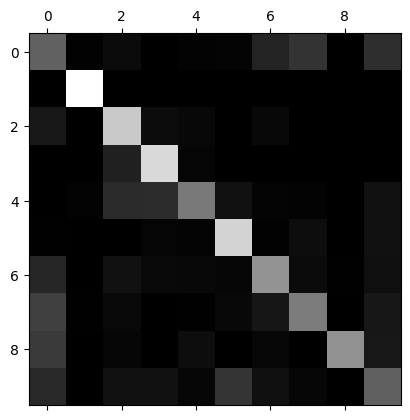





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6783783783783783
Fold: 2 ----> Validation Score: 0.6432432432432432
Fold: 3 ----> Validation Score: 0.6189189189189189
Fold: 4 ----> Validation Score: 0.6459459459459459
Fold: 5 ----> Validation Score: 0.6270270270270271
Fold: 6 ----> Validation Score: 0.6351351351351351
Fold: 7 ----> Validation Score: 0.6513513513513514
Fold: 8 ----> Validation Score: 0.6270270270270271
Fold: 9 ----> Validation Score: 0.6324324324324324
Fold: 10 ----> Validation Score: 0.6162162162162163



Evaluation for C = 0.1
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l2
C : 0.1
Model trained with training dataset
Accuracy score on testing dataset: 0.49158249158249157
ROC AUC Score on testing dataset: 0.8569762900545145
Accuracy score on training dataset: 0.6454054054054054
ROC AUC Score on training datas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))







Confusion Matrix: 
[[139   2  15   1  10   3  52  75   6  67]
 [  0 370   0   0   0   0   0   0   0   0]
 [ 30   0 291  14  19   0  16   0   0   0]
 [  0   0  31 319  20   0   0   0   0   0]
 [  2   2  54  37 211  17   5   8   0  34]
 [  2   1   0   6  10 299   4  17   0  31]
 [ 52   0  30  10  18   5 209  17   3  26]
 [ 91   2  10   0   4  14  32 182   1  34]
 [ 84   0   1   0  27   0  12   0 210  36]
 [ 59   0  23  21   8  80  22   5   0 152]]


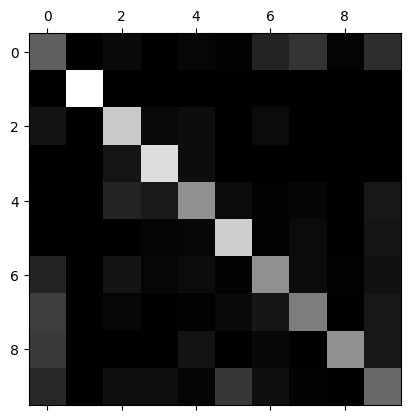





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6783783783783783
Fold: 2 ----> Validation Score: 0.6513513513513514
Fold: 3 ----> Validation Score: 0.6162162162162163
Fold: 4 ----> Validation Score: 0.6459459459459459
Fold: 5 ----> Validation Score: 0.6351351351351351
Fold: 6 ----> Validation Score: 0.6405405405405405
Fold: 7 ----> Validation Score: 0.6567567567567567
Fold: 8 ----> Validation Score: 0.6378378378378379
Fold: 9 ----> Validation Score: 0.6351351351351351
Fold: 10 ----> Validation Score: 0.6378378378378379



Evaluation for C = 1.0
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l2
C : 1.0
Model trained with training dataset
Accuracy score on testing dataset: 0.4781144781144781
ROC AUC Score on testing dataset: 0.853643355706874
Accuracy score on training dataset: 0.6462162162162162
ROC AUC Score on training dataset

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))







Confusion Matrix: 
[[134   1  17   1  11   3  51  70  13  69]
 [  0 370   0   0   0   0   0   0   0   0]
 [ 28   0 292  13  21   0  16   0   0   0]
 [  0   0  26 311  31   2   0   0   0   0]
 [  3   0  50  36 217  16   4   9   0  35]
 [  1   1   0   6  11 293   5  17   0  36]
 [ 49   0  31   8  18   7 208  17   7  25]
 [ 90   2  10   0   4  14  33 178   3  36]
 [ 82   0   2   0  26   0  13   0 213  34]
 [ 59   0  22  22  10  81  19   4   1 152]]


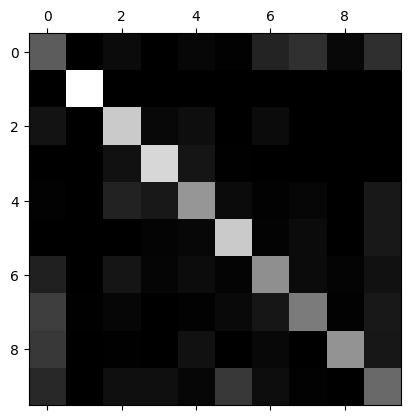





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6702702702702703
Fold: 2 ----> Validation Score: 0.6567567567567567
Fold: 3 ----> Validation Score: 0.6135135135135135
Fold: 4 ----> Validation Score: 0.6405405405405405
Fold: 5 ----> Validation Score: 0.6351351351351351
Fold: 6 ----> Validation Score: 0.6324324324324324
Fold: 7 ----> Validation Score: 0.6378378378378379
Fold: 8 ----> Validation Score: 0.6324324324324324
Fold: 9 ----> Validation Score: 0.6378378378378379
Fold: 10 ----> Validation Score: 0.6432432432432432


In [112]:
#model with regularization
C = [0.0001, 0.001, 0.01, 0.1, 1.0]
for c in C:
    print('\n\n')
    print('=' * 75)
    print(f'Evaluation for C = {c}')
    print('=' * 75)
    model2 = get_model(
        multi_class = 'multinomial',
        solver_function = 'saga',
        max_iter = 10000,
        regularization = True,
        penalty='l2',
        C = c
    )

    evaluate_model(model2,X_train, X_test, y_train, y_test, 10)

### CASE 2 : Train = 10 % Test = 90%
Our objective is to split the yeast dataset into 10, 90 data split.
1. Train = 10 % Test = 90%
  - [ x_train2,y_train2] = 10%
  - [ x_test2,y_test2] = 90%



In [113]:
X_train, X_test, y_train, y_test = get_X_y(
                                            yeast,
                                            features,
                                            label,
                                            0.9,
                                            None,
                                            3,
                                            'scale',
                                            'label'
                                          )

Shape of Training Data set: X: (148, 8), y: (148,)
Shape of Testing Data set: X: (1336, 8), y: (1336,)
Feature Extraction/standardisation complete.
Encoding of target variable is complete.
Resampling ignored.


In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 8), (1336, 8), (148,), (1336,))

#### Category 1: Building and testing the model **without** *regularization*.

- Since the model is already built, we do not have to rebuild the model for without regularization technique. We can directly fit the model which is already generated.

Train and Test is regenerated above with the case 2 scenario.
You can see the shape of the generated dataset above.

Model trained with training dataset
Accuracy score on testing dataset: 0.5396706586826348
ROC AUC Score on testing dataset: 0.8586100288187832
Accuracy score on training dataset: 0.6013513513513513
ROC AUC Score on training dataset: 0.9255267727103671




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55       417
           1       0.33      1.00      0.50         4
           2       0.53      0.68      0.59        31
           3       0.61      0.57      0.59        40
           4       0.41      0.30      0.35        46
           5       0.74      0.72      0.73       147
           6       0.59      0.55      0.57       220
           7       0.51      0.42      0.46       386
           8       0.78      0.39      0.52        18
           9       0.00      0.00      0.00        27

    accuracy                           0.54      1336
   macro avg       0.50      0.53      0.49      13

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(







Confusion Matrix: 
[[32  0  0  0  1  0  1 12  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  1  0  0]
 [ 0  0  0  3  1  0  0  0  0  0]
 [ 1  0  1  0  3  0  0  0  0  0]
 [ 1  0  0  0  0 15  0  0  0  0]
 [ 5  0  0  0  1  0 11  7  0  0]
 [20  0  0  0  0  1  6 16  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 3  0  0  0  0  0  0  0  0  0]]


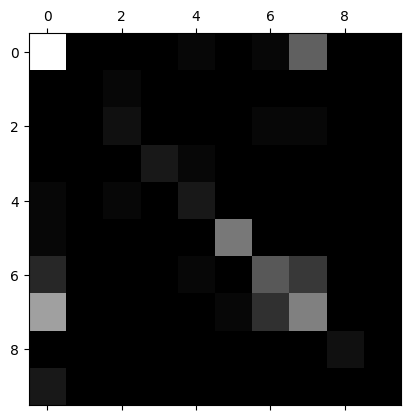

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(






K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6
Fold: 2 ----> Validation Score: 0.6
Fold: 3 ----> Validation Score: 0.6
Fold: 4 ----> Validation Score: 0.4666666666666667
Fold: 5 ----> Validation Score: 0.3333333333333333
Fold: 6 ----> Validation Score: 0.6
Fold: 7 ----> Validation Score: 0.8
Fold: 8 ----> Validation Score: 0.5333333333333333
Fold: 9 ----> Validation Score: 0.42857142857142855
Fold: 10 ----> Validation Score: 0.5


In [114]:
evaluate_model(model1,X_train, X_test, y_train, y_test, 10)

Category 2: Building and testing the model ***with regularization***.
Since the model is already built, we do not have to rebuild the model for **with ** regularization technique. We can directly fit the model which is already generated.
Train and Test is regenerated above with the case 2 scenario. You can see the shape of the generated dataset above.

***Regularization Technique used: L1***





Evaluation for C = 0.0001
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l1
C : 0.0001
Model trained with training dataset
Accuracy score on testing dataset: 0.312125748502994
ROC AUC Score on testing dataset: 0.5
Accuracy score on training dataset: 0.3108108108108108
ROC AUC Score on training dataset: 0.5




Classification report on Testing dataset:
               precision    recall  f1-score   support

           0       0.31      1.00      0.48       417
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       147
           6       0.00      0.00      0.00       220
           7       0.00      0.00      0.00       386
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

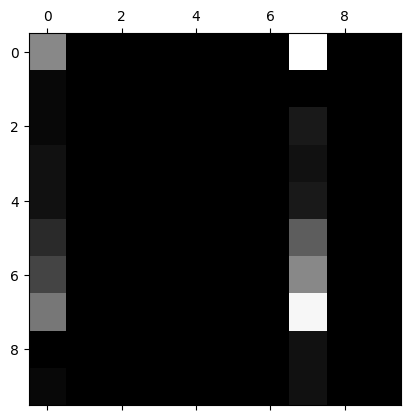

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(






K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.3333333333333333
Fold: 2 ----> Validation Score: 0.3333333333333333
Fold: 3 ----> Validation Score: 0.26666666666666666
Fold: 4 ----> Validation Score: 0.3333333333333333
Fold: 5 ----> Validation Score: 0.3333333333333333
Fold: 6 ----> Validation Score: 0.3333333333333333
Fold: 7 ----> Validation Score: 0.26666666666666666
Fold: 8 ----> Validation Score: 0.26666666666666666
Fold: 9 ----> Validation Score: 0.2857142857142857
Fold: 10 ----> Validation Score: 0.2857142857142857



Evaluation for C = 0.001
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l1
C : 0.001
Model trained with training dataset
Accuracy score on testing dataset: 0.28892215568862273
ROC AUC Score on testing dataset: 0.5
Accuracy score on training dataset: 0.2905405405405405
ROC AUC Score on training dataset: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

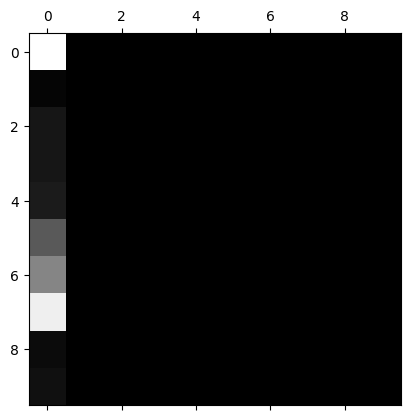

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.3333333333333333
Fold: 2 ----> Validation Score: 0.3333333333333333
Fold: 3 ----> Validation Score: 0.3333333333333333
Fold: 4 ----> Validation Score: 0.3333333333333333
Fold: 5 ----> Validation Score: 0.26666666666666666
Fold: 6 ----> Validation Score: 0.3333333333333333
Fold: 7 ----> Validation Score: 0.26666666666666666
Fold: 8 ----> Validation Score: 0.26666666666666666
Fold: 9 ----> Validation Score: 0.2857142857142857
Fold: 10 ----> Validation Score: 0.2857142857142857



Evaluation for C = 0.01
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l1
C : 0.01
Model trained with training dataset
Accuracy score on testing dataset: 0.28892215568862273
ROC AUC Score on testing dataset: 0.5
Accuracy score on training dataset: 0.2905405405405405
ROC AUC Score on training dataset: 0.5




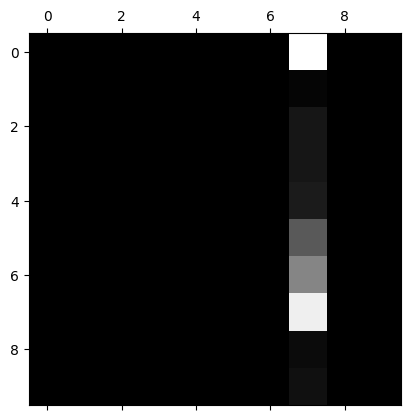

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr





K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.3333333333333333
Fold: 2 ----> Validation Score: 0.3333333333333333
Fold: 3 ----> Validation Score: 0.3333333333333333
Fold: 4 ----> Validation Score: 0.3333333333333333
Fold: 5 ----> Validation Score: 0.3333333333333333
Fold: 6 ----> Validation Score: 0.3333333333333333
Fold: 7 ----> Validation Score: 0.26666666666666666
Fold: 8 ----> Validation Score: 0.26666666666666666
Fold: 9 ----> Validation Score: 0.2857142857142857
Fold: 10 ----> Validation Score: 0.2857142857142857



Evaluation for C = 0.1
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l1
C : 0.1
Model trained with training dataset
Accuracy score on testing dataset: 0.4962574850299401
ROC AUC Score on testing dataset: 0.7504243607670998
Accuracy score on training dataset: 0.5337837837837838
ROC AUC Score on training data

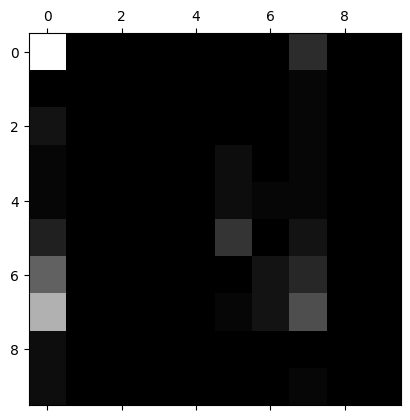

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(






K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.4666666666666667
Fold: 2 ----> Validation Score: 0.6666666666666666
Fold: 3 ----> Validation Score: 0.4
Fold: 4 ----> Validation Score: 0.26666666666666666
Fold: 5 ----> Validation Score: 0.3333333333333333
Fold: 6 ----> Validation Score: 0.4
Fold: 7 ----> Validation Score: 0.4
Fold: 8 ----> Validation Score: 0.6
Fold: 9 ----> Validation Score: 0.42857142857142855
Fold: 10 ----> Validation Score: 0.5



Evaluation for C = 1.0
Params for model: 
              Multi Class : multinomial
              Solver Function : saga
              Max Iteration : 10000
Regularization is selected for building the model.
Penalty : l1
C : 1.0
Model trained with training dataset
Accuracy score on testing dataset: 0.5531437125748503
ROC AUC Score on testing dataset: 0.8606611636642958
Accuracy score on training dataset: 0.6148648648648649
ROC AUC Score on training dataset: 0.9250446267636037




Classification report on Testing dataset:
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/






Confusion Matrix: 
[[32  0  1  0  0  0  1 12  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  1  1  0  0]
 [ 0  0  1  3  0  0  0  0  0  0]
 [ 1  0  1  1  2  0  0  0  0  0]
 [ 1  0  0  0  0 14  0  1  0  0]
 [ 6  0  0  0  1  0 11  6  0  0]
 [20  0  0  0  0  1  6 16  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 3  0  0  0  0  0  0  0  0  0]]


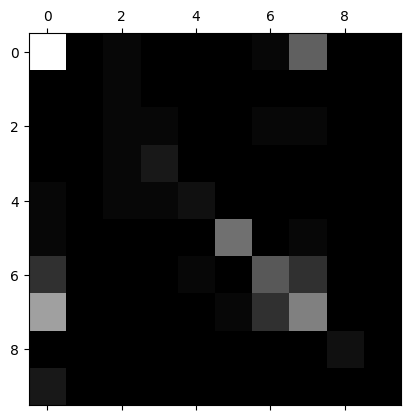

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(






K-Fold Cross validation:
Fold: 1 ----> Validation Score: 0.6
Fold: 2 ----> Validation Score: 0.6
Fold: 3 ----> Validation Score: 0.6
Fold: 4 ----> Validation Score: 0.4
Fold: 5 ----> Validation Score: 0.3333333333333333
Fold: 6 ----> Validation Score: 0.6
Fold: 7 ----> Validation Score: 0.8
Fold: 8 ----> Validation Score: 0.5333333333333333
Fold: 9 ----> Validation Score: 0.42857142857142855
Fold: 10 ----> Validation Score: 0.5


In [117]:
#model with regularization
C = [0.0001, 0.001, 0.01, 0.1, 1.0]
for c in C:
    print('\n\n')
    print('=' * 75)
    print(f'Evaluation for C = {c}')
    print('=' * 75)
    model2 = get_model(
        multi_class = 'multinomial',
        solver_function = 'saga',
        max_iter = 10000,
        regularization = True,
        penalty='l1',
        C = c
    )

    evaluate_model(model2,X_train, X_test, y_train, y_test, 10)

### Need of regularization:
Explore the need of regularization and incorporate few relevant techniques for the problem statement

Compare models with and without regularization in a tabular format and justify the findings.

  ### Summary on Model Evaluation and class imbalances:
  1. We have done the feature engineering on yeast dataset and fixed the class imbalance using SMOTE resampling, which had balanced the class distribution of the target variable, so that model can predict and generate the right outcome without any ***Bias***.
  2. We have trained the model WITH and WITHOUT Regularization.
  3. WITH Regulariation had showed better results when compared with the "WITHOUT".
  4. For the case 1: 80-20 train-test datasets, we have observed the better AUC score using "WITH" Regularization.

```
  ===========================================================================
  Evaluation for C = 0.0001
  ===========================================================================
  Accuracy score on testing dataset: 0.494949494949495
  ROC AUC Score on testing dataset: 0.823999066641961
  Accuracy score on training dataset: 0.5510810810810811
  ROC AUC Score on training dataset: 0.8894592159727296

  ===========================================================================
  Evaluation for C = 0.001
  ===========================================================================
  Model trained with training dataset
  Accuracy score on testing dataset: 0.5286195286195287
  ROC AUC Score on testing dataset: 0.8481253978381984
  Accuracy score on training dataset: 0.6124324324324324
  ROC AUC Score on training dataset: 0.9096273841408978

  ===========================================================================
  Evaluation for C = 0.01
  ===========================================================================
  Accuracy score on testing dataset: 0.5185185185185185
  ROC AUC Score on testing dataset: 0.8618021643057399
  Accuracy score on training dataset: 0.6413513513513514
  ROC AUC Score on training dataset: 0.923191867543219

  ===========================================================================
  Evaluation for C = 0.1
  ===========================================================================
  Accuracy score on testing dataset: 0.49158249158249157
  ROC AUC Score on testing dataset: 0.8569762900545145
  Accuracy score on training dataset: 0.6454054054054054
  ROC AUC Score on training dataset: 0.9261669507345183
  ===========================================================================
  Evaluation for C = 1.0
  ===========================================================================
  Model trained with training dataset
  Accuracy score on testing dataset: 0.4781144781144781
  ROC AUC Score on testing dataset: 0.853643355706874
  Accuracy score on training dataset: 0.6462162162162162
  ROC AUC Score on training dataset: 0.9269462705949192
```






***Based on the above results, C =1.0, Model had performed very well.***

####Thank You###